In [2]:
import cv2 as cv 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
def to_screen(name, file):
    cv.imshow(name, file)  
    cv.waitKey(0)
    cv.destroyAllWindows()  

### Assignment 1


In [74]:
building = cv.imread("../afbeeldingen/building.png")
sobel_building = building.copy()
# naar_scherm("building", building)


gray = cv.cvtColor(sobel_building, cv.COLOR_BGR2GRAY).astype("float32")

scale = 1
delta = 0
ddepth = cv.CV_32F

## horziontal first order derivative
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

## do not forget to take abs because negative values!
abs_grad_x = np.abs(grad_x)
clipped = np.clip(abs_grad_x,0,255)
grad_uint8 = clipped.astype("uint8")


# print(grad_uint8.dtype)
to_screen("sobel", grad_uint8)

cv.imwrite('./resultaten_lab2/ass1.png', grad_uint8)


True

### Assignment 2

In [10]:
rays = cv.imread("../afbeeldingen/rays.png")
to_screen("rays", rays)

In [ ]:
ksize = 15
sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8

### step 1

# Creates a 1-D Gaussian kernel 
kernel = cv.getGaussianKernel(ksize, sigma, cv.CV_32F)
square = np.zeros((15,15), dtype="float32")
square[7,:] = kernel.flatten()
ax = sns.heatmap(square)
plt.show()

### step 2
kernel2 = cv.getGaussianKernel(ksize, sigma-1, cv.CV_32F)
filter = cv.filter2D(square, -1, kernel2)


ax = sns.heatmap(filter)
plt.show()

### step 3
dog = cv.Sobel(filter, ddepth, 0, 1, ksize=3)

ax = sns.heatmap(dog)
plt.show()

### step 4
M = cv.getRotationMatrix2D((7, 7), 45, 1)
rows,cols = dog.shape
img_output_ingebouwd = cv.warpAffine(dog, M, (cols,rows))

ax = sns.heatmap(img_output_ingebouwd)
plt.savefig('./resultaten_lab2/ass2.png')
plt.show()


In [7]:
# Tip: to visualize 
# floating point arrays like the DoG filter, rescale the values to [-0.5, 0.5] and add 0.5 to
# them so that black represents negative, gray zero, and white positive values.

# Normalised [-1,1]
normalised = 2.*(img_output_ingebouwd - np.min(img_output_ingebouwd))/np.ptp(img_output_ingebouwd)-1
print(np.amax(normalised))

# [-0.5, 0.5]
normalised_half  = normalised * 0.5
print(np.amax(normalised_half))

normalised_added = normalised_half + 0.5

to_screen("dog_normalised", normalised_added)
cv.imwrite('./resultaten_lab2/ass2.tiff', normalised_added)

#.tiff to depict float32, image is very small though, using heatmaps instead.


1.0
0.5


True

### Assignment 3 

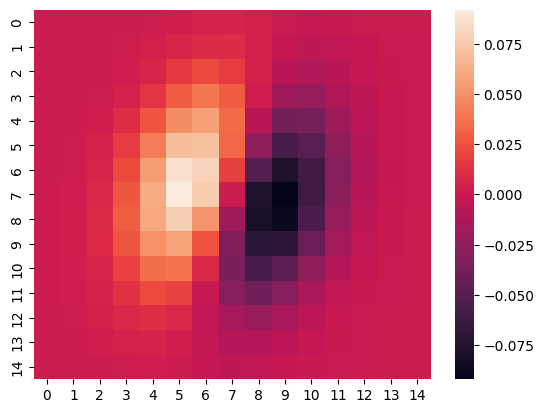

In [14]:
# 75 degrees instead of 45 tot get angle of yellow stripes with x-axis,
# other steps the same as previous exercise
M2 = cv.getRotationMatrix2D((7, 7), 75, 1)
yellow_strips_filter = cv.warpAffine(dog, M2, (cols,rows))

ax = sns.heatmap(yellow_strips_filter)
plt.show()

In [18]:
yellow_strips = rays.copy()
gray_strips = cv.cvtColor(yellow_strips, cv.COLOR_BGR2GRAY)
gray_strips_float = gray_strips.astype("float32")

# print(gray_strips_float.dtype)
result_yellow_strips = cv.filter2D(gray_strips_float, -1, yellow_strips_filter)
abs_strips = np.abs(result_yellow_strips)
clipped_strips = np.clip(abs_strips,0,255)

strips_uint8 = clipped_strips.astype("uint8")
to_screen("result_strips", strips_uint8)
cv.imwrite('./resultaten_lab2/ass3.png', strips_uint8)

True

### Assignment 4

In [70]:
canny = rays.copy()
edges = cv.Canny(canny,100,100)
to_screen("canny_edges", edges)
cv.imwrite('./resultaten_lab2/ass4.png', edges)

True

### Assignment 5

In [71]:
painting4 = cv.imread("../afbeeldingen/painting4.jpg")
to_screen("painting", painting4)

In [72]:
painting_copy = painting4.copy()

# blur painting to lose line of painting
blur_painting = cv.blur(painting_copy,(5,5))
to_screen("canny_edges_paiting", blur_painting)

edges_painting = cv.Canny(blur_painting, 140, 250)
to_screen("canny_edges_paiting", edges_painting)
cv.imwrite('./resultaten_lab2/ass5.png', edges_painting)

True

### Assignment 6

In [73]:
### source: https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

# This returns an array of r and theta values
lines = cv.HoughLines(edges_painting, 1, np.pi/180, 150)


# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float32)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
  
    x0 = a*r
    y0 = b*r
  
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv.line(painting_copy, (x1, y1), (x2, y2), (0, 255, 255), 2)

to_screen("houg_lines", painting_copy)


cv.imwrite('./resultaten_lab2/ass6.png', painting_copy)

True

### Assignment 7

In [65]:
shot1 = cv.imread("../afbeeldingen/shot1.png")
shot2 = cv.imread("../afbeeldingen/shot2.png")

shot1_harris = shot1.copy()
shot2_harris = shot2.copy()
# to_screen("shot2", shot1)

gray_shot1 = cv.cvtColor(shot1_harris, cv.COLOR_BGR2GRAY)
gray_float1 = np.float32(gray_shot1)
dst1 = cv.cornerHarris(gray_float1,2,3,0.04)

gray_shot2 = cv.cvtColor(shot2_harris, cv.COLOR_BGR2GRAY)
gray_float2 = np.float32(gray_shot2)
dst2 = cv.cornerHarris(gray_float2,2,3,0.04)

shot1_harris[dst1>0.01*dst1.max()]=[0,0,255]
shot2_harris[dst2>0.01*dst2.max()]=[0,0,255]

to_screen("harris_1", shot1_harris)
to_screen("harris_1", shot2_harris)

cv.imwrite('./resultaten_lab2/ass7_part1.png', shot1_harris)
cv.imwrite('./resultaten_lab2/ass7_part2.png', shot2_harris)


True

### Assignment 4

In [67]:
shot1_orb = shot1.copy()
shot2_orb = shot2.copy()

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(shot1,None)
kp2, des2 = orb.detectAndCompute(shot2,None)


# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 32 matches.
result = cv.drawMatches(shot1_orb,kp1,shot2_orb,kp2,matches[:32],
                      None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

to_screen("orb", result)
cv.imwrite('./resultaten_lab2/ass8.png', result)


## calib 8 beste tot nu toe 

True